<a href="https://colab.research.google.com/github/justkittenaround/Courseworks/blob/master/Methods_Complex_Systems/Final_ComplexSystemProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please make a copy of this document and then share your copy with williamedwardhahn@gmail.com

#Modeling Complex Systems

# Cuttlefish Optimization Algorithm
### A nature inspired heuristic by [Eesa, Brifcani, & Orman (2013)](https://www.ijser.org/paper/Cuttlefish-Algorithm-A-Novel-Bio-Inspired-Optimization-Algorithm.html).

<iframe width="900" height="506" src="https://www.youtube.com/embed/pgDE2DOICuc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [203]:
from IPython.display import HTML
HTML('<iframe width="900" height="506" src="https://www.youtube.com/embed/pgDE2DOICuc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Cuttlefish Skin Cells


The Cuttlefish Optimization Alforithm **(CFA)**, was designed to mimick the cuttlefish's ability to change its own skin pattern and color. This task can be formulated as an optimization problem upon considering the natural method this phenomena occurs, by cuttlefish skin cells. Their skin is made up of three types of cells. Chromataphores are pigment muscle cells on the surface of the skin that enable color by expansion and contraction. These cells are saccules pigmented with orange, black, yellow, red, or brown granules. Cromataphore cells have complex inner network stuctures containing reflective proteins. The next layer of cells are called iridophores. These reflect and refract light, creating more metallic color tones and are important in concealing the animal from predators. The bottom layer of skin cells, leucophores, scatter light. These cells help camouflage the cuttlefis by reflecting the predominant wavelength of light as it hits their skin to match what is below them. The interaction between the three stacked layers of cells allow for the complexity of colors. A combination of external stimuli sensing and controlled nervous system While the decision-making process for organizing color and pattern changes are still not fully known, we can model the cell and light interaction mathematically. The problem to be optimized thus involves two main variables: reflection of light by the three cells and visibility to match patterns (fig. 1-2). The goal then becomes to finding the global opimum of the interaction of these processes.

**Figure One:**  \\
![How light reflection can occure in cuttlefish skin cells.](https://www.ijser.org/paper/Cuttlefish-Algorithm-A-Novel-Bio-Inspired-Optimization-Algorithm/Image_001.jpg)
 \\
 How light reflection can occure in cuttlefish skin cells.
 \\
  \\
**Figure Two:**  \\
![Six cases of cell and light reflection interactions.](https://www.ijser.org/paper/Cuttlefish-Algorithm-A-Novel-Bio-Inspired-Optimization-Algorithm/Image_002.jpg)
 \\
Six cases of cell and light reflection interactions.
  \\
  \\


## CFA

Color organization can then be broken down into six cases of ineraction between light reflection and the various types of cells (fig 2). These six cases can be used as variables to model reflection. Visibility can then be described as the difference between the curent solution and the best solution. Local and global searches for new patterns can be described by groups of interactions between cells. \\

**Group One:** \\
 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1674c5ceac7e8ad3e3400659b248bc0cdffd6639)
>- case 1 and case 2 cells
>- interaction between chromataphors and iridophores
>- local search


**Group Two:** \\
 ![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/8337dda18c64a4914a603a53aac2d03a614a38ad)
>- case 3 and case 4 cells
>- iridophores are reflecing incoming light as a specific color 
>- optimal visibility are assumed as concealed organs (best solution)
>- global search


**Group Three:** \\
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c9f8488a85ed191c37dd89520848b942c3782ed4)
>- case 5 cells
>- leucophores mirror predominant wavelength of light in environment
>- global search


**Group Four:** \\
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2d6bcbdd410c3c74d67a009520fbd07171c0d6d5)
>- case 6 cells
>- leucophores
>- local search

 \\


### The general method to the algorithm is: 

1.   randomlly initialize best solution
2.   new solutions by reflection and visibility equations for group 1 (chromatophores and iridophores)
3.   new solutions by refleciton and visibility equations for group 2 (iridophores)
4.   new solution by reflection and visibility equations for group 3 (leucophores)
5.   new solution by reflection and visiblity equations for group 4 (leucophores)
6.   save the best population (of cells)



## CFA Algorithm Code

#### Pseudo-code (from paper)


   1.  Initialize population (P[N]) with random solutions, Assign the values of r1, r2, v1, v2.
   2. Evaluate the population and Keep the best solution.
   3. Divide population into four groups (G1, G2, G3 and G4).
   4. Repeat 
        >- Calculate the average value of the best solution.
        >- for (each element in G1) generate new solution using Case(1 and 2)
        >- for (each element in G2) generate new solution using Case(3 and 4)
        >- for (each element in G3) generate new solution using Case(5)
        >- for (each element in G4) generate new solution using Case(6)
        >- Evaluate the new solutions 
   5. Until (stopping criterion is met)
   6. Return the best solution

#### CFA functions to implement when applying to a problem

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:

def R(r1,r2): 
    return (np.random.randint(0,2)*(r1-r2)+r2) #R =refleciton degree (stretch angle of chromataphore saccule) * group 1 cells' points

def V(v1,v2):
    return(np.random.randint(0,2)*(v1-v2)+v2) #V =visibility degree of final view of pattern * group 1 cells' points, we set to 1 as paper suggested

def init_pop(n,d,s):
    P = np.random.rand(n,d) * s #create the points for n cells in d dimensions across possible values s
    #divide the points into the four groups
    g1 = P[:25,] 
    g2 = P[25:50,]
    g3 = P[50:75,]
    g4 = P[75:,]
    return P, g1,g2,g3,g4

#Group 1 equations:
def g1f(best):
    ref = R(2, -1)*g1  #reflection
    vis = 1*(best-g1)  #visibility
    newP = ref+vis
    return newP

#Group 2 equations:
def g2f(best):
    ref = 1*best
    vis = V(1.5,-1.5)*(best-g2)
    newP = ref+vis
    return newP

#Group 3 equations:
def g3f(best):
    ref = 1*best
    vis = V(1,-1)*(best-np.average(best))
    newP = ref+vis
    return newP

#Group 4 equations:
def g4f(n,d,s):
     P = np.random.randint(0, s, (n, d)) 
     return P


#### Setting up a toy-problem to check the CFA algorithm:

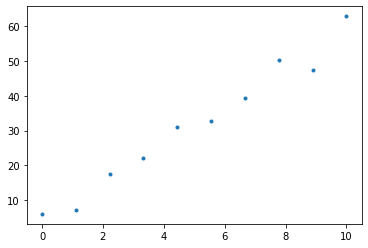

In [206]:
x = np.linspace(0,10,10)                 #generate some data points
noise = 5 * np.random.randn(x.shape[0])  #create some noise to make it more realistic
y = 6*x + 2 + noise                      #generate the values (with noise) for each datapoint
plt.plot(x,y,'.')                        #plot them to see what our data looks like

##### Run the CFA steps while iterating through the data to update our parameters and find a good fit:

89.38532133430293


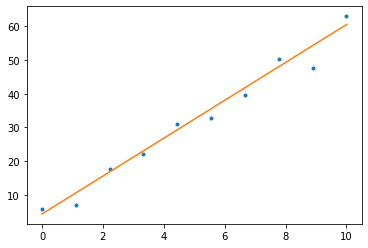

In [207]:
iters = 100                                       #number of iteration to run CFA 
n = 100                                           #number of cells
d = 2                                             #dimensions of cell points
s = 10                                            #search size space

P, g1,g2,g3,g4 = init_pop(n,d,s)                   #Initialize the popultaion with random solutions
y2 = x *P[:,0][:,None] + P[:,1][:,None]            #y=xm+b prediction based on current params 
loss = np.sum(((y2) - y)**2,1)                     #mean-squared error loss function 
best = P[np.argmin(loss)]                          #to determine best solution

for i in range(iters):
    
    newP = g1f(best)                                            #CFA step
    y2 = x *newP[:,0][:,None] + newP[:,1][:,None]                  #fit model to parameters                
    if np.amin(np.sum(((y2) - y)**2,1)) < np.amin(loss):           #evaluate loss
        loss = np.sum(((y2) - y)**2,1)                             #redefine the loss to compare in next CFA step
        best = newP[np.argmin(loss)]                               #update params
        
    newP = g2f(best)
    y2 = x *newP[:,0][:,None] + newP[:,1][:,None]
    if np.amin(np.sum(((y2) - y)**2,1)) < np.amin(loss):
        loss = np.sum(((y2) - y)**2,1)
        best = newP[np.argmin(loss)]

    newP = g3f(best)
    newP = np.expand_dims(newP, 0)
    y2 = x *newP[:,0][:,None] + newP[:,1][:,None]
    if np.amin(np.sum(((y2) - y)**2,1)) < np.amin(loss):
        loss = np.sum(((y2) - y)**2,1)
        best = newP[np.argmin(loss)]
    
    newP = g4f(n,d,s)
    y2 = x *newP[:,0][:,None] + newP[:,1][:,None] 
    if np.amin(np.sum(((y2) - y)**2,1)) < np.amin(loss):
        loss = np.sum(((y2) - y)**2,1)
        best = newP[np.argmin(loss)]

    
    
m,b = best                                           #take the converged best of the cells
y2 = m*x+b                                           #make the prediction using the best cell params
plt.plot(x,y,'.')                                    #plot the original data
plt.plot(x,y2)                                       #plot our best solution                      
print(np.amin(loss))                                 #print our final loss

# Minesweeper
### an NP-complete or co-NP-complete problem 

Minesweeper is a game that appeared on early PCs in 1990 by the creator Curt Johnson. The game starts with a n by m grid with blank square that are turned over to reveal mines or numbered squares. Numbers indicated how many mines are near that square. The game is played by using deductive reasoning to uncover all the square that are not mines. Clicking on a mine results in a losing game. The game was first published as being Np complete in 2000 by Richard Kaye. To give us an understanding of the grid and peices, the video below demonstrates how the game is played.

#### How to play minesweeper video

In [208]:
from IPython.display import HTML
HTML('<iframe width="900" height="735" src="https://www.youtube.com/embed/7B85WbEiYf4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Np-complete and co-NP types of problems


Simply put, NP Problems are those which we can check if there is a solution in polynomial time and whose solution is solvable in non-polynomial time. Rather, the steps to solve the problem are non-polynomial function of the size of the problem. This class of problems inutitively includes P type problems (in which the problem itself, in any size, is solvable in polynomial time). The hardest problems in the class of NP problems are called NP-complete. If a NP-complete type problem was solved in polynomial time (say by some crazy new algorithm), all other NP problems would then be solvable in essentially the same way. Similarly to NP-complete problems, co-NP-complete problems are those NP type problems which a negated solution can be verified in polynomial time but true solution may exist in exponential time. 




### Minesweeper Problem

*If  we consider a Minesweeper grid in which some information about the placement of bombs is present, can we determine **if there is a solution**? This question, minesweeper consistency, is NP complete.* \

Let's take the minesweeper grid in the figure below. The dark grey squares (blanks) indicate no mine present and not touching any mines. The numbered dark grey squares indicates that a mine is nearby. The number indicates exactly how many mines that square is touching. The light grey squares are un-turned peices where mines could be present. Thus, there is two seperate placements of mines which offer a solution to this grid.

![Minesweeper Wire](https://i.imgur.com/NJ9hczV.png)

Given any placement of mines we can quickly verify if the constraints of the grid are met. If so, this is a possible solution. Consider one such mine placement shown below. Is this a solution? By checking all the numbered squares and satisfying their number in relation to how many mines they're each touching, we can see this solution holds true. (PS... if you moved every mine to the right by one quare, this would be the second possible solution.)

![Minesweeper Wire Solution](https://i.imgur.com/K9B7fIy.png)

We've now shown that Minesweeper consistency is an NP-complete type problem because:
1. given any grid with partial information, solving the grid requires exponential steps as the size of the grid increases
2. given any possible complete grid, the steps required for verifying if the grid is a solution (i.e. if the mines are placed correctly) is a polynomial funciton

It's important to note the destinction between Minesweeper consistency and solving Minesweeper the game (i.e. Minesweeper inference). Minesweeeper inference is a co-NP-complete type problem wich seeks to answer: *given a partial grid, can you figure out where the bombs are placed?* To demonstrate how this question is different than the previous one, consider a partial grid with only blank squares. A possible solution is given to you that the entire grid is blank. There are no mines are numbered squares. You can quickly verify that this grid is satisfying the constraints of the game. That is the NP-complete problem. However, given the same partial blank grid, Is it possible to find were the minds are? This is the co-NP-complete problem because:
1. as the size of the partial grid increases, steps for checking all posible solutions to the grid increase non-polynomially 
2. checking false solutions are in polynomial time 



## Pytorch Implementation of Minesweeper with CFA

**Notes:** \
>- We're going to use the cells as possible grid solutions to the Minesweeper grid (not as parameters as in the toy example previously).
>- Reflection and visibility paramaters r1,r2,v1,v2 will be optimized using auto-diff (and helper pytorch functions).
>- We will use the number 9 to denote X's (mines) for easier computations.
>- The gridsize denotes one length of the square grid and needs to be >= 3.
>- Smooth-L1 loss has had best results so far.
>- AdamW is the best optimizer so far.

In [209]:
import random
import re
import time
import numpy as np

!pip install wandb
import wandb as wb

import torch
from torch.autograd import Variable

###### minesweeper functions

In [0]:
#this section of code was borrowed from Mohamed Akram @ https://gist.github.com/mohd-akram/3057736
#it creates a solved minesweeper grid (grid) and returns where the mines are

def setupgrid(gridsize, start, numberofmines):
    emptygrid = [['0' for i in range(gridsize)] for i in range(gridsize)]
    mines = getmines(emptygrid, start, numberofmines)
    for i, j in mines:
        emptygrid[i][j] = 'X'
    grid = np.asarray(getnumbers(emptygrid)).astype('str')
    grid[grid=='X'] = '9'
    grid = grid.astype(int)
    return (grid, mines)

def getmines(grid, start, numberofmines):
    mines = []
    neighbors = getneighbors(grid, *start)
    for i in range(numberofmines):
        cell = getrandomcell(grid)
        while cell == start or cell in mines or cell in neighbors:
            cell = getrandomcell(grid)
        mines.append(cell)
    return mines

def getneighbors(grid, rowno, colno):
    gridsize = len(grid)
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0:
                continue
            elif -1 < (rowno + i) < gridsize and -1 < (colno + j) < gridsize:
                neighbors.append((rowno + i, colno + j))
    return neighbors

def getrandomcell(grid):
    gridsize = len(grid)
    a = random.randint(0, gridsize - 1)
    b = random.randint(0, gridsize - 1)
    return (a, b)

def getnumbers(grid):
    for rowno, row in enumerate(grid):
        for colno, cell in enumerate(row):
            if cell != 'X':
                # Gets the values of the neighbors
                values = [grid[r][c] for r, c in getneighbors(grid, rowno, colno)]
                # Counts how many are mines
                grid[rowno][colno] = str(values.count('X'))
    return grid


In [0]:
#to start the game, we need the grid to be unturned in some places (according to the starting square)
def startgrid(gridsize, grid, start):
    fixedidx = getneighbors(grid, *start)
    fixedidx.append(tuple(start))
    omitgrid = [idx for idx in list(np.ndindex(gridsize, gridsize)) if idx not in fixedidx]
    sgrid = np.asarray(grid.copy().astype(str))
    for idx in omitgrid:
        sgrid[idx] = ' '
    return sgrid, omitgrid, fixedidx

In [0]:
# a little function to make our solution grid in the familar aesthetic
def pretty(best):
    best = np.asarray(best)
    best = best.astype('str')
    best[best == '9'] = 'X'
    return best

###### CFA functions

In [0]:
def R(r1,r2): 
    return (torch.randint(2, (1, 1))*(r1-r2)+r2).to(device) #R =refleciton degree (stretch angle of chromataphore saccule) * group 1 cells' points

def V(v1,v2):
    return (torch.randint(2, (1, 1))*(v1-v2)+v2).to(device) #V =visibility degree of final view of pattern * group 1 cells' points, we set to 1 as paper suggested

def init_pop(n,d):
    P = torch.randint(low=0, high=10, size=(wab.n, wab.gridsize, wab.gridsize), dtype=torch.float32, requires_grad=True).to(device)
    for idx in range(P.shape[0]):
        for i,j in fixedidx:
            P[idx, i,j] = torch.Tensor(grid.astype(int))[i,j]
    split = P.shape[0]//4
    g1 = P[:split,].to(torch.float32).to(device) 
    g2 = P[split:split+split,].to(torch.float32).to(device)
    g3 = P[2*split:3*split,].to(torch.float32).to(device)
    g4 = P[3*split:,].to(torch.float32).to(device)
    return P, g1,g2,g3,g4


In [0]:
# loss will be computed for each cell compared to the actual grid solution
# sum the whole grid for each cell
def min_loss(newP):
    return torch.min(crit(newP, y).sum((1,2)))

###### Run functions

In [0]:
#this allows our code to run for up to 10k iterations
import sys
sys.setrecursionlimit(10000)

In [216]:
#set deviice to gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [217]:
###Hyperparameters:

# Graphs / links to Weights&Biases run pages
# !wandb off                          #turn off wandb for debugging
!wandb on
!wandb.login()
wb.init(project='CFA-minesweeper-pytorch')
wab = wb.config

#define variables of the minesweepergame
wab.gridsize = 4                      #size of grid
wab.numberofmines = 1                 #how many mines to place
wab.start = (0,0)                     #first square click (where to start)

d = (wab.gridsize,wab.gridsize)       #tuple of the gridsize                    

#define variables of CFA                           
wab.n = 200                            #how many cells for the CFA 


W&B enabled, running your script from this directory will now sync to the cloud.
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [0]:
#helpful for debugging by making all random variables reproducable
# torch.manual_seed(0)
# np.random.seed(0)

In [0]:
#set up the grid and get starting partial grid and the indexes that can be changed or fixed
grid, mines_idx = setupgrid(wab.gridsize, wab.start, wab.numberofmines)
startg, openidx, fixedidx = startgrid(wab.gridsize, grid, wab.start)

In [0]:
###define a loss function 

# crit = torch.nn.L1Loss(reduction='none')
# wab.loss_fx = 'L1'

crit = torch.nn.SmoothL1Loss(reduction='none')
wab.loss_fx = 'SmoothL1'

# crit = torch.nn.MSELoss(reduction='none')
# wab.loss_fx = 'MSE'


In [221]:
#Run the CFA to play minesweeper   
iters = 0
y = torch.Tensor(grid.astype(int)).to(device)      #get the complete minesweeper grid
P, g1,g2,g3,g4 = init_pop(wab.n,d)               #initialize the population of cuttlefish cells
loss = crit(P, y).sum((1,2))                       #calc error between predicted grid and actual minesweeper grid 
best = P[torch.argmin(loss),...]                   #save the closest predicted grid (to the actual)                


r1_1 = Variable(torch.randn(1), requires_grad=True)
r2_1 = Variable(torch.randn(1), requires_grad=True)
v1_2 = Variable(torch.randn(1), requires_grad=True)
v2_2 = Variable(torch.randn(1), requires_grad=True)    
v1_3 = Variable(torch.randn(1), requires_grad=True)
v2_3 = Variable(torch.randn(1), requires_grad=True)

params = [r1_1, r2_1, v1_2, v2_2, v1_3, v2_3]


###define an optimizer to change the parameters according to the gradients accumulated in loss.backwards()
# optimizer = torch.optim.SGD(params, lr=0.001)
# wab.optim = 'sgd'

optimizer = torch.optim.AdamW(params, 0.2)
wab.optim='adamW'

# optimizer = torch.optim.Adagrad(params)
# wab.optim='adagrad'

# optimizer = torch.optim.RMSprop(params,0.01)
# wab.optim='rms'


# ###define a schedule to control the learning rate as the loss approaches zero
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10) 


def run(P, g1,g2,g3,g4, loss, best, since, iters):               #make a function so we can run recursively
   
    optimizer.zero_grad()                                        #zero the optimizer gradients

    #group one CFA cells
    ref = g1.clone()                                             #make a copy of group1 cells for math purposes
    for i, j in openidx:                                         #the startgrid will be preserved throughout (since it is already revealed)
        ref[:,i,j] *= (R(r1_1, r2_1)).squeeze()                  #calc reflection
    vis = g1.clone()  
    for i, j in openidx:
        vis[:,i,j] -= best[i,j]                                  #calc visiblity
    vis = torch.nn.functional.relu(1*vis)                        #some values could be negative, apply rectified linear unit function
    newP = ref.clone()
    for i, j in openidx:
        newP[:,i,j] += vis[:,i,j]                                 #add reflection and visibility to get new grid (only for the positions not in starting grid)
    if min_loss(newP) < torch.min(loss):                          #if the new grid closer to the actual grid then the previous best grid         
        loss = crit(newP, y).sum((1,2))                           #redefine the loss to be with the new population of cells (grids)
        best = newP[torch.argmin(loss),...]                       #save the best grid in the new population
        (loss.sum()).backward(retain_graph=True)                  #calc gradients for each variable with retain_graph
        optimizer.step()
        optimizer.zero_grad()                                     #update the variables according to the calc gradients and the optimizer math
        print('1', r1_1) 
    wb.log({"r1_1": r1_1.item(), "r2_1": r2_1.item()})            #record these variables in wandb

    #group two CFA cells
    ref = 1*best
    vis = g2.clone()
    for i, j in openidx:
        vis[:,i,j] -= best[i,j]
        vis[:,i,j] *= (V(v1_2,v2_2)).squeeze()
    vis = torch.nn.functional.relu(vis)                           
    newP = vis.clone()
    for i, j in openidx:
        newP[:,i,j] += ref[i,j]
    if min_loss(newP) < torch.min(loss):                                  
        loss = crit(newP, y).sum((1,2))
        best = newP[torch.argmin(loss),...]
        (loss.sum()).backward(retain_graph=True)
        optimizer.step() 
        optimizer.zero_grad() 
        print('2', v1_2)             
    wb.log({"v1_2": v1_2.item(), "v2_2": v2_2.item()}) 

    #group three CFA cells
    ref = 1*best
    vis = best.clone()
    for i,j in openidx:
        vis -= torch.mean(best)
        vis *= (V(v1_3,v2_3)).squeeze()
    vis = torch.nn.functional.relu(vis)
    newP = vis.clone()
    for i, j in openidx:
        newP[i,j] += ref[i,j]  
    if crit(newP, y).sum() < torch.min(loss):                                  
        loss = crit(newP, y).sum()
        best = newP
        (loss.sum()).backward(retain_graph=True)
        optimizer.step()
        optimizer.zero_grad() 
        print('3', v1_3) 
    wb.log({"v1_3": v1_3.item(), "v2_3": v2_3.item()}) 

    #group four CFA cells
    P = torch.randint(low=0, high=10, size=(wab.n, wab.gridsize, wab.gridsize), dtype=torch.float32, requires_grad=True).to(device)  #group four is the same as brute forcing (random guess)
    for i,j in fixedidx:
        P[:, i,j] = torch.Tensor(grid).to(torch.float32)[i,j] 
    if min_loss(P) < torch.min(loss):                                  
        loss = crit(P, y).sum((1,2))
        best = P[torch.argmin(loss),...]                              
        (loss.sum()).backward(retain_graph=True)
        optimizer.step()
        optimizer.zero_grad() 
        print('4') 
    
    (loss.sum()).backward(retain_graph=True)
    optimizer.step()
    scheduler.step(torch.abs(crit(best.int(), y).sum()))           #activate the scheduler  according to the loss of the best grid  
    wb.log({'LR': scheduler.get_lr()[0]})                            #record the learning rate
    wb.log({"Loss": torch.abs(crit(best.int(), y).sum()).item()})    #record the loss
    
    if torch.abs(crit(best.int(), y).sum()) == 0:                    #if loss is 0, we have solved the game
        print('\n', 'Solution found!')
        print(pretty(grid.astype(int)), '\n')                                            
        print(pretty(best.detach().cpu().numpy().astype(int)), '\n')                                                                     
        print('Total loss after', iters, 'iterations is:', torch.abs(crit(best.int(), y).sum()))
        print('Time:', time.time()-since)
        sys.exit('Program complete.')

    iters+=1                                                         #count each iteration (epoch) 
    run(P, g1,g2,g3,g4, loss, best, since, iters)                    #run all cfa steps again (until solved or max recursion limit reached)


since = time.time()                                                  #for counting the time it takes
run(P, g1,g2,g3,g4, loss, best, since, iters)
print(best, y)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:798: UserWarning: Using a target size (torch.Size([4, 4])) that is different to the input size (torch.Size([200, 4, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:798: UserWarning: Using a target size (torch.Size([4, 4])) that is different to the input size (torch.Size([50, 4, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:143: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from 

2 tensor([-0.4711], requires_grad=True)
2 tensor([0.2192], requires_grad=True)


KeyboardInterrupt: ignored

Error in callback <function _init_jupyter.<locals>.cleanup at 0x7fc04778a6a8> (for post_run_cell):


KeyboardInterrupt: ignored

In [0]:
best,y

## Minesweeper Brute Force (for comparison to CFA):

As a sanity check to make sure the CFA algorithm does improve our search (best try with a gridsize 3).

In [0]:
y = torch.Tensor(grid.astype(int)).to(device)      #get the complete minesweeper grid
P, g1,g2,g3,g4 = init_pop(wab.n,d,s)               #initialize the population of cuttlefish cells
loss = crit(P, y).sum((1,2))                       #calc error between predicted grid and actual minesweeper grid 
best = P[torch.argmin(loss),...]                   #save the closest predicted grid (to the actual)              

In [0]:
iters = 0

def run(n, d, s, best, loss, since, iters):
    P = torch.randint(0, 10, (wab.n, wab.gridsize, wab.gridsize), dtype=torch.float32, requires_grad=True).to(device)
    for i,j in fixedidx:
        P[:, i,j] = torch.Tensor(grid).to(torch.float32)[i,j] 
    if min_loss(P) <= torch.min(loss):                                  
        loss = crit(P, y).sum((1,2))
        best = P[torch.argmin(loss),...]                              
        (loss.sum()).backward(retain_graph=True)


    wb.log({"Loss": loss.sum().item()}) 
    
    iters += 1
    
    if crit(best.int(), y).sum() == 0:
        print('\n', 'Solution found!')
        print(pretty(grid.astype(int)), '\n')                                            
        print(pretty(best.detach().cpu().numpy().astype(int)), '\n')                                                                     
        print('Total loss after', iters, 'iterations is:', loss.sum().item())
        print('Time:', time.time() - since)
        sys.exit('Program complete.')
    
    run(wab.n, d, s, best, loss, since, iters)

In [0]:
since = time.time()
try:
    run(wab.n, d, s, best, loss, since, iters)
except(KeygridInterrupt):
    print(pretty(grid.astype(int)), '\n')                                            
    print(pretty(best.detach().cpu().numpy().astype(int)), '\n')                                                                     
    print('Total loss after', iters, 'iterations is:', loss.sum().item())     

## And now lets use a CNN, because why not?

In [333]:
y = torch.Tensor(grid.astype(int)).to(device)      #get the complete minesweeper grid
P, g1,g2,g3,g4 = init_pop(wab.n,d)               #initialize the population of cuttlefish cells
loss = crit(P, y).sum((1,2))                       #calc error between predicted grid and actual minesweeper grid 
best = P[torch.argmin(loss),...]                   #save the closest predicted grid (to the actual) 

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:798: UserWarning: Using a target size (torch.Size([4, 4])) that is different to the input size (torch.Size([200, 4, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction)


In [334]:
P = P.unsqueeze(1)
ys = y.unsqueeze(0).repeat(P.shape[0], 1,1,1)
print(ys.shape)

torch.Size([200, 1, 4, 4])


In [335]:
P.to(device)
ys.to(device)

tensor([[[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]],


        [[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]],


        [[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]],


        ...,


        [[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]],


        [[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]],


        [[[0., 0., 0., 0.],
          [1., 1., 1., 0.],
          [1., 9., 1., 0.],
          [1., 1., 1., 0.]]]], device='cuda:0')

In [336]:
print(P.shape, ys.shape)

torch.Size([200, 1, 4, 4]) torch.Size([200, 1, 4, 4])


In [0]:
class CNN(torch.nn.Module):
    def __init__(self, gridsize):
        super(CNN, self).__init__()
        self.gs = gridsize
        self.conv = torch.nn.Conv2d(1, 1, gridsize-1, stride=1, padding=1)
        self.conv1 = torch.nn.Conv2d(1,1, gridsize, stride=1, padding=0, dilation=1)
        self.conv2 = torch.nn.Conv2d(1, 1, gridsize, stride=2, padding=2)
        self.relu = torch.nn.ReLU()
        self.fc = torch.nn.Linear(1,1)
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        # x = self.conv1(x)
        # x = self.relu(x)
        # x = self.conv2(x)
        # x = self.relu(x)
        # x = self.fc(x)
        return(x)

In [338]:
model = CNN(wab.gridsize)
model.to(device)

CNN(
  (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(1, 1, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(1, 1, kernel_size=(4, 4), stride=(2, 2), padding=(2, 2))
  (relu): ReLU()
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [0]:
optimizer = torch.optim.AdamW(params, 0.2)
wab.optim='adamW'

criterion = torch.nn.SmoothL1Loss(reduction='none')
wab.loss_fx = 'SmoothL1'

In [0]:
def train():
    for epoch in range(10000000):
        out = model(P)
        loss = criterion(out, ys)
        optimizer.zero_grad()
        (loss.sum()).backward(retain_graph=True)
        optimizer.step()
        best = out[torch.argmin(loss.sum((1,2,3)))]
        if (best.int() - ys[0,].int()).sum() == 0:                   
            print('\n', 'Solution found!')
            print(y[0,])                                          
            print(best.detach().cpu().numpy().astype(int), '\n')                                                                     
            print('Total loss after', epoch, 'iterations is:', criterion(best,ys[0,]).detach().cpu().item())
            print('Time:', time.time()-since)
            return(best)
        if epoch%100 == 0:
            print(phase, epoch, torch.min(loss.sum((1,2,3)))) 

In [341]:
y

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 0.],
        [1., 9., 1., 0.],
        [1., 1., 1., 0.]], device='cuda:0')

In [0]:
out = train()

train 0 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 100 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 200 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 300 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 400 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 500 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 600 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 700 tensor(11.7808, device='cuda:0', grad_fn=<MinBackward1>) tensor(14.2563, device='cuda:0', grad_fn=<MaxBackward1>)
train 800 

In [0]:
out

# Minesweeper
### a Turing-Complete system simulation

##### Turing-Complete Systems

A Turing machine is one that can simulate and algorithm by reading, writting, and moving about a single string (or tape) of values according to a table of rules. A similar machine that is also able to recognize the rule table for any other turing machine is said to be Turing-Complete. Therefore, we only need to simulate any Turing-Complete system to show Turing-Completeness in a new system.

##### Mine-sweeper Turing-Completeness

Minesweeper was shown to be Turing-Complete in [2007 by Richard Kay](http://web.mat.bham.ac.uk/R.W.Kaye/minesw/infmsw.pdf) who stated the game played on an infinite grid is anologous to the proven Turing-Complete [game of life](https://web.stanford.edu/class/sts145/Library/life.pdf). Furthermore, the mines in this version of Minesweeper have different rules in the table. The assertion rest upon the availability of infinite time and memory. Here we can simulate a finite version of such machine by constructing a rule table of logic gates. Given the assertions mentions, configuring the Minesweeper simulation to perform logic gates, the program is shows Turing-Completeness. The figures below are directly from Richard Kay's paper. The top figure details how cells in the grid must be configured according to have a partial configuration (C) surrounded by infinite other cells that satisfies the rule table (R). These components compute the value for each state of the turing machine tape. As Kay described, the rule table for manipulating the tape can then be written as shown partially in the middle figure. Combining the top and bottom process allows us to construct wires for logic gates. The bottom image details the constructed logic gate in the infinite board. The left and right states are wires (as we saw earlier can be configured in Minewsweeper) holding single 0 or 1 values. States in and out represent wire streams caring the machines state and head information. Basically, the infinite, orthogonal Minesweeper board creates the states which instruct the head of the Turing machine.

![alt text](https://i.imgur.com/AwLRYXE.png)![alt text](https://i.imgur.com/PApgfkd.png)![alt text](https://i.imgur.com/pYVYaUp.png)

In [0]:
#Simulation of minesweeper turing mahine 
##I had a lot of trouble with this. I'm not sure if its just not possible to code because you need an infinite plane
###or if I'm not briding the gap between the wires in the grid and the turing tape.  

In [0]:
tape = [1,0,1, ...]

In [0]:
def read(i):
    action = check_rules(tape[i])

In [0]:
def write(state):
    if state == 2:
        tape[i:] == 0
    return tape

In [0]:
def move(i):
    direction = check_rules(tape[i])
    if direction > 0 :
        i = i+1
    elif direction < 0:
        i = i-1
    elif direction == 0:
        i = i
    return i

In [0]:
def compute_grid():
    #get the rule table for the wires coming in.
    return something

In [0]:
def check_rules(tape):
    a,b,c = tape
    R = compute_grid
    action = #what do based on(R)
    return action

In [0]:
# Outline how you would use your choosen turing-complete system to impliment your choosen heuristic algorithm.

The Turing-complete Minesweeper machine simulator (MTCS) takes in states from left and right inputs. These states and the current state dictate the head to perform action (or not), which is all computed by the minesweeper logic gate components. We can think of setting up the Minesweeper components as the CFA algorithm itself. The rule table could be written in the Minesweeper orthogonality approach so that the process of moving from one population of cells, evaluating the loss, updating the population best, and moving to the next population to repeat the process is preserved. The initial configuration (C) would serve as the starting populations of cells. They would have to be configured in orthoganality agreement as shown in the figure below. In the original MTCS, the set of values in minesweeper (a,b,c,d,e,f,g) have been replaced for our group of cells, G1 as group 1 and so forth. Neutral values have also been replaced with random neutral values that represent the reflection and vsibility terms in the original CFA functions, L for the loss, and B for the best population update. By converting the reflection and visiblity components between 0, 1, and N, we can simulate wires that, in more complex arrangements, can form logic gates. Rule tables for each wire would be configured for the \{G1,G2,G3,G4,L,B} and \{0,1,N,G1,G2,G3,G4,L,B} depending on each configuration. This approach is redundant because when a logic (L) or best (B) value is needed, it would branch into its own specific logic wire configuration to compute that terms values as the turing state moves about the tape. Since these wires carry the state and head location, they turing machine would potentially be optimized since they CFA wires are controlling it.
 

![alt text](https://i.imgur.com/6MnJKzz.png)

# References and Reads

CuttleFish and CFA:
*   https://www.ijser.org/researchpaper/Cuttlefish-Algorithm-A-Novel-Bio-Inspired-Optimization-Algorithm.pdf
*   http://giantcuttlefish.com/?tag=chromatophore
*   https://en.wikipedia.org/wiki/List_of_metaphor-based_metaheuristics#Cuttlefish
*   https://www.mathworks.com/matlabcentral/fileexchange/63416-cuttlefish-optimization-algorithm
*   https://en.wikipedia.org/wiki/List_of_metaphor-based_metaheuristics 

Minesweeper, NP Completeness, Turing Machines:
*   https://www.youtube.com/watch?v=ziViLYrf1Ak
*   https://www.youtube.com/watch?v=7B85WbEiYf4
*   https://en.wikipedia.org/wiki/List_of_NP-complete_problems 
*   https://en.wikipedia.org/wiki/Turing_completeness
*   https://www.youtube.com/watch?v=W9G_1xG77LE
*   https://www.youtube.com/watch?v=YX40hbAHx3s
*   https://en.wikipedia.org/wiki/Microsoft_Minesweeper
*   http://www.minesweeper.info/articles/MinesweeperIsNPComplete.pdf
*   https://gist.github.com/mohd-akram/3057736

Background on Heuristics, Computer Science, and Mathematics in Complexity:
*   https://www.youtube.com/watch?v=EKWGGDXe5MA
*   https://www.youtube.com/watch?v=k_GFq12w5WU&feature=emb_title
*   https://www.youtube.com/watch?v=_eC14GonZnU
*   https://www.youtube.com/watch?v=gV67Sj2jkVg
*   https://www.youtube.com/watch?v=WllJrHX_3ZI
*   https://www.youtube.com/watch?v=QKKD-_VxxFA





![alt text](http://giantcuttlefish.com/wp-content/uploads/2014/02/Cave-P-2_9537-23.jpg)